In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches

In [3]:
df = pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [4]:
df_validation_heb = pd.read_csv(r'../../results/validation-vs-computed-fuel-rates-heb-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [5]:
df_validation_cdb = pd.read_csv(r'../../results/validation-vs-computed-fuel-rates-cdb-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [6]:
df.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'ServiceDateTime', 'DateKey', 'CalendarDate', 'Year',
       'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName',
       'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName', 'Vehicle',
       'VehicleType', 'SeatedCap', 'TotalCap', 'Lat', 'Lon', 'Boards',
       'Alights', 'Onboard', 'Bike', 'Daytype', 'Hour', 'Minute', 'Second',
       'Date', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'time_delta_in_seconds', 'dist', 'Speed', 'Acceleration', 'elevation',
       'grade', 'Energy'],
      dtype='object')

In [7]:
df['Route'].unique()

array(['R44', '39E', '9999', '(X) 39E', 'B48', '801', '806', 'B6', 'R14',
       'X92', 'G73', 'X90', '821', '820', 'P11', '804', '805', '824',
       '823', '802', '892', '803', 'R24', '(X) P11', 'B17', 'R10', 'G3',
       'B4', 'B7', 'R29', 'B23', 'P20', 'G5', '(X) 821', '(X) 804',
       '(X) 892', '(X) 823', '(X) 801', '(X) 820', '(X) 802', 'G1', 'B12',
       'G2', '921', '(X) 805', '(X) 824', '(X) 803', 'P21', '(X) 902',
       '(X) 806', '890', 'B9', '(X) B9', 'R42', 'R41', 'B79', '38', '30',
       '31', '33', '46', '45', '(X) 38', '36', '35', '34', '(X) 34',
       'B43', '943', '(X) 943'], dtype=object)

In [8]:
# replace all occurrences of '(X)' with an empty string
df['Route'] = df['Route'].str.replace(r'\(X\)|\(\)', '', regex=True)

In [9]:
df['Route'].unique()

array(['R44', '39E', '9999', ' 39E', 'B48', '801', '806', 'B6', 'R14',
       'X92', 'G73', 'X90', '821', '820', 'P11', '804', '805', '824',
       '823', '802', '892', '803', 'R24', ' P11', 'B17', 'R10', 'G3',
       'B4', 'B7', 'R29', 'B23', 'P20', 'G5', ' 821', ' 804', ' 892',
       ' 823', ' 801', ' 820', ' 802', 'G1', 'B12', 'G2', '921', ' 805',
       ' 824', ' 803', 'P21', ' 902', ' 806', '890', 'B9', ' B9', 'R42',
       'R41', 'B79', '38', '30', '31', '33', '46', '45', ' 38', '36',
       '35', '34', ' 34', 'B43', '943', ' 943'], dtype=object)

In [10]:
df['Route'] = df['Route'].str.lstrip()

In [11]:
df['Route'].unique()

array(['R44', '39E', '9999', 'B48', '801', '806', 'B6', 'R14', 'X92',
       'G73', 'X90', '821', '820', 'P11', '804', '805', '824', '823',
       '802', '892', '803', 'R24', 'B17', 'R10', 'G3', 'B4', 'B7', 'R29',
       'B23', 'P20', 'G5', 'G1', 'B12', 'G2', '921', 'P21', '902', '890',
       'B9', 'R42', 'R41', 'B79', '38', '30', '31', '33', '46', '45',
       '36', '35', '34', 'B43', '943'], dtype=object)

In [12]:
# convert gallons of diesel to kwh
df_gal = df.copy()
# multiply Energy by 33.7 where Powertrain is 'conventional' or 'hybrid'
df_gal.loc[df_gal['Powertrain'].isin(['electric']), 'Energy'] = df_gal['Energy'] / 33.7

In [13]:
# convert gallons of diesel to kwh
df_kwh = df.copy()
# multiply Energy by 33.7 where Powertrain is 'conventional' or 'hybrid'
df_kwh.loc[df_kwh['Powertrain'].isin(['conventional', 'hybrid']), 'Energy'] = df_kwh['Energy'] * 33.7

In [14]:
# Preparation for plotting
df_model_aggregated_routes = df_kwh.groupby(['Route','Date' ,'Hour']).agg({'Energy': ['sum'],'dist': ['sum'],'Onboard':['sum'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated_routes.columns = df_model_aggregated_routes.columns.droplevel(1)
df_model_aggregated_routes['Date'] = pd.to_datetime(df_model_aggregated_routes['Date'])
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("X","")
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("(","")
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace(")","")

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\3933258828.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("(","")
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\3933258828.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace(")","")


In [15]:
df_model_aggregated_routes = df_model_aggregated_routes.groupby(['Route','Hour']).agg({'Energy': ['mean'],'dist': ['mean'],'Onboard':['mean'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated_routes.columns = df_model_aggregated_routes.columns.droplevel(1)
df_model_aggregated_routes['fuel_economy']=df_model_aggregated_routes['dist']/df_model_aggregated_routes['Energy']
df_model_aggregated_routes['energy_intensity']=df_model_aggregated_routes['Energy']/df_model_aggregated_routes['Onboard']

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\1764107466.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap = sns.heatmap(df_model_aggregated_routes.pivot("Route", "Hour", "Energy"), cmap="YlOrRd")


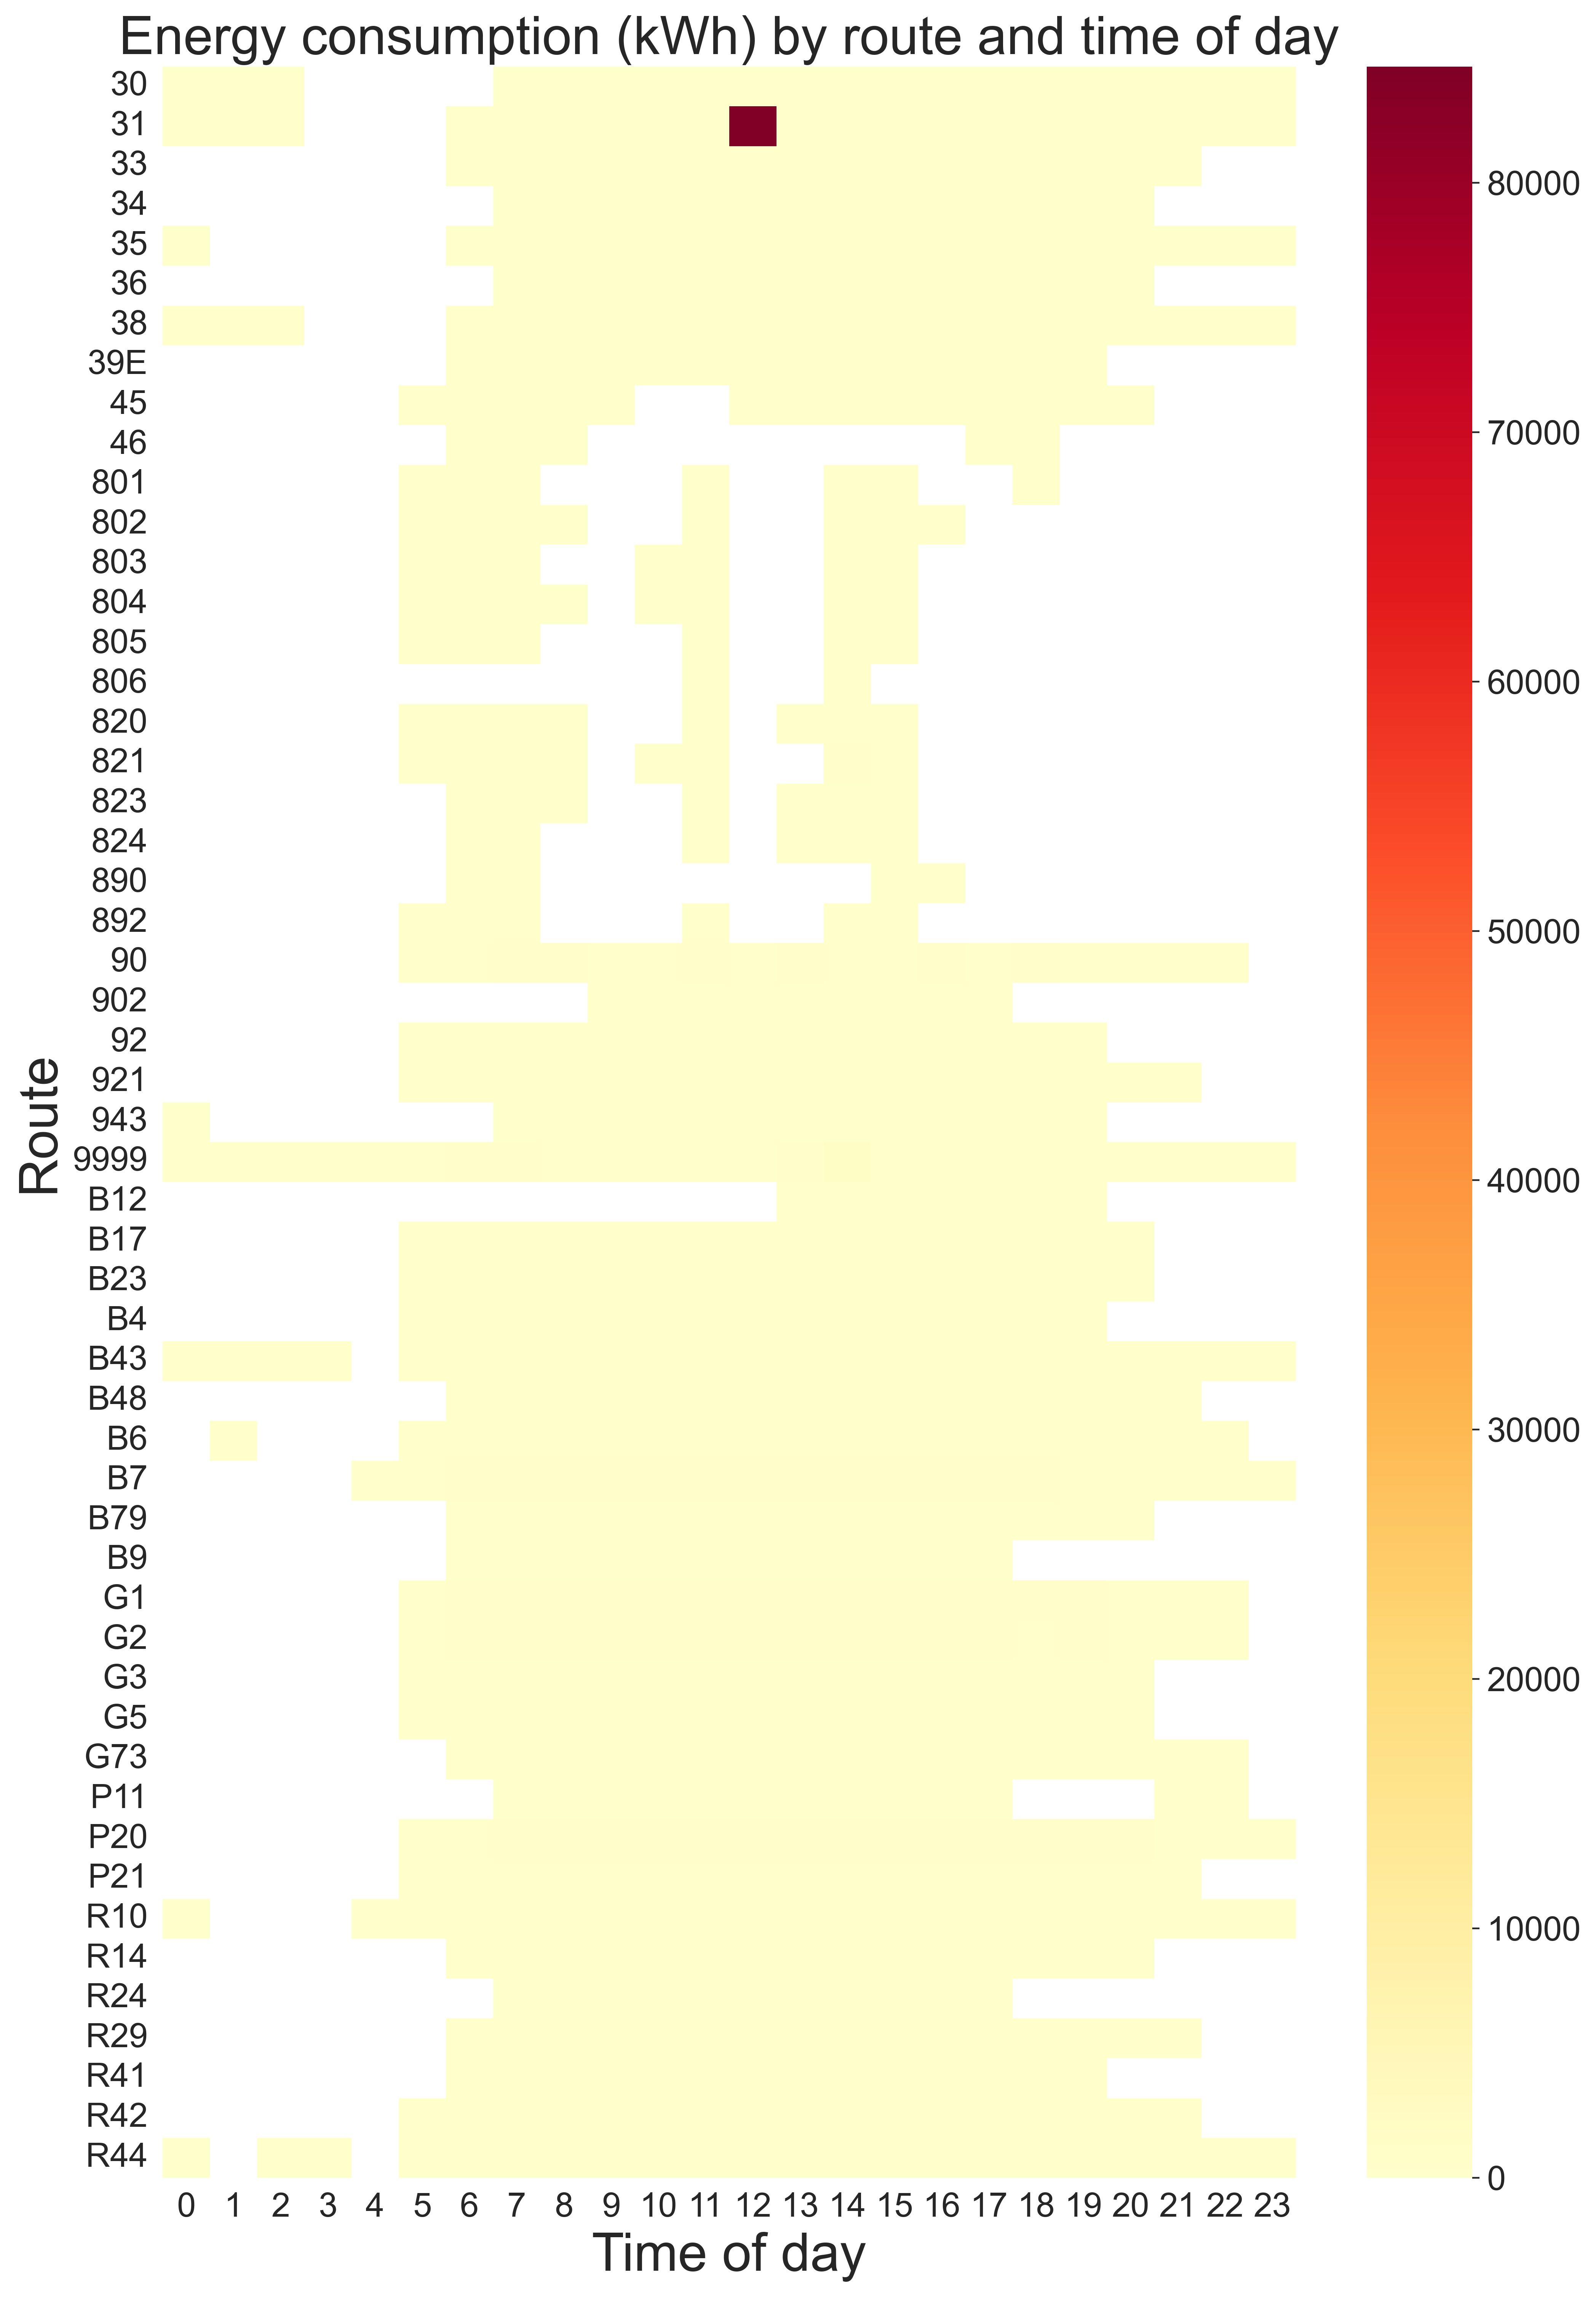

In [16]:
# Set the style of the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 18), dpi=400)


# Create the heatmap
heatmap = sns.heatmap(df_model_aggregated_routes.pivot("Route", "Hour", "Energy"), cmap="YlOrRd")
plt.ylabel('Route', fontsize=25)
plt.xlabel('Time of day', fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)


# Set the title of the plot
plt.title("Energy consumption (kWh) by route and time of day", fontsize=25)

# Show the plot
plt.show()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\3640767148.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap =sns.heatmap(df_model_aggregated_routes.pivot("Route", "Hour", "fuel_economy"), cmap="YlOrRd")


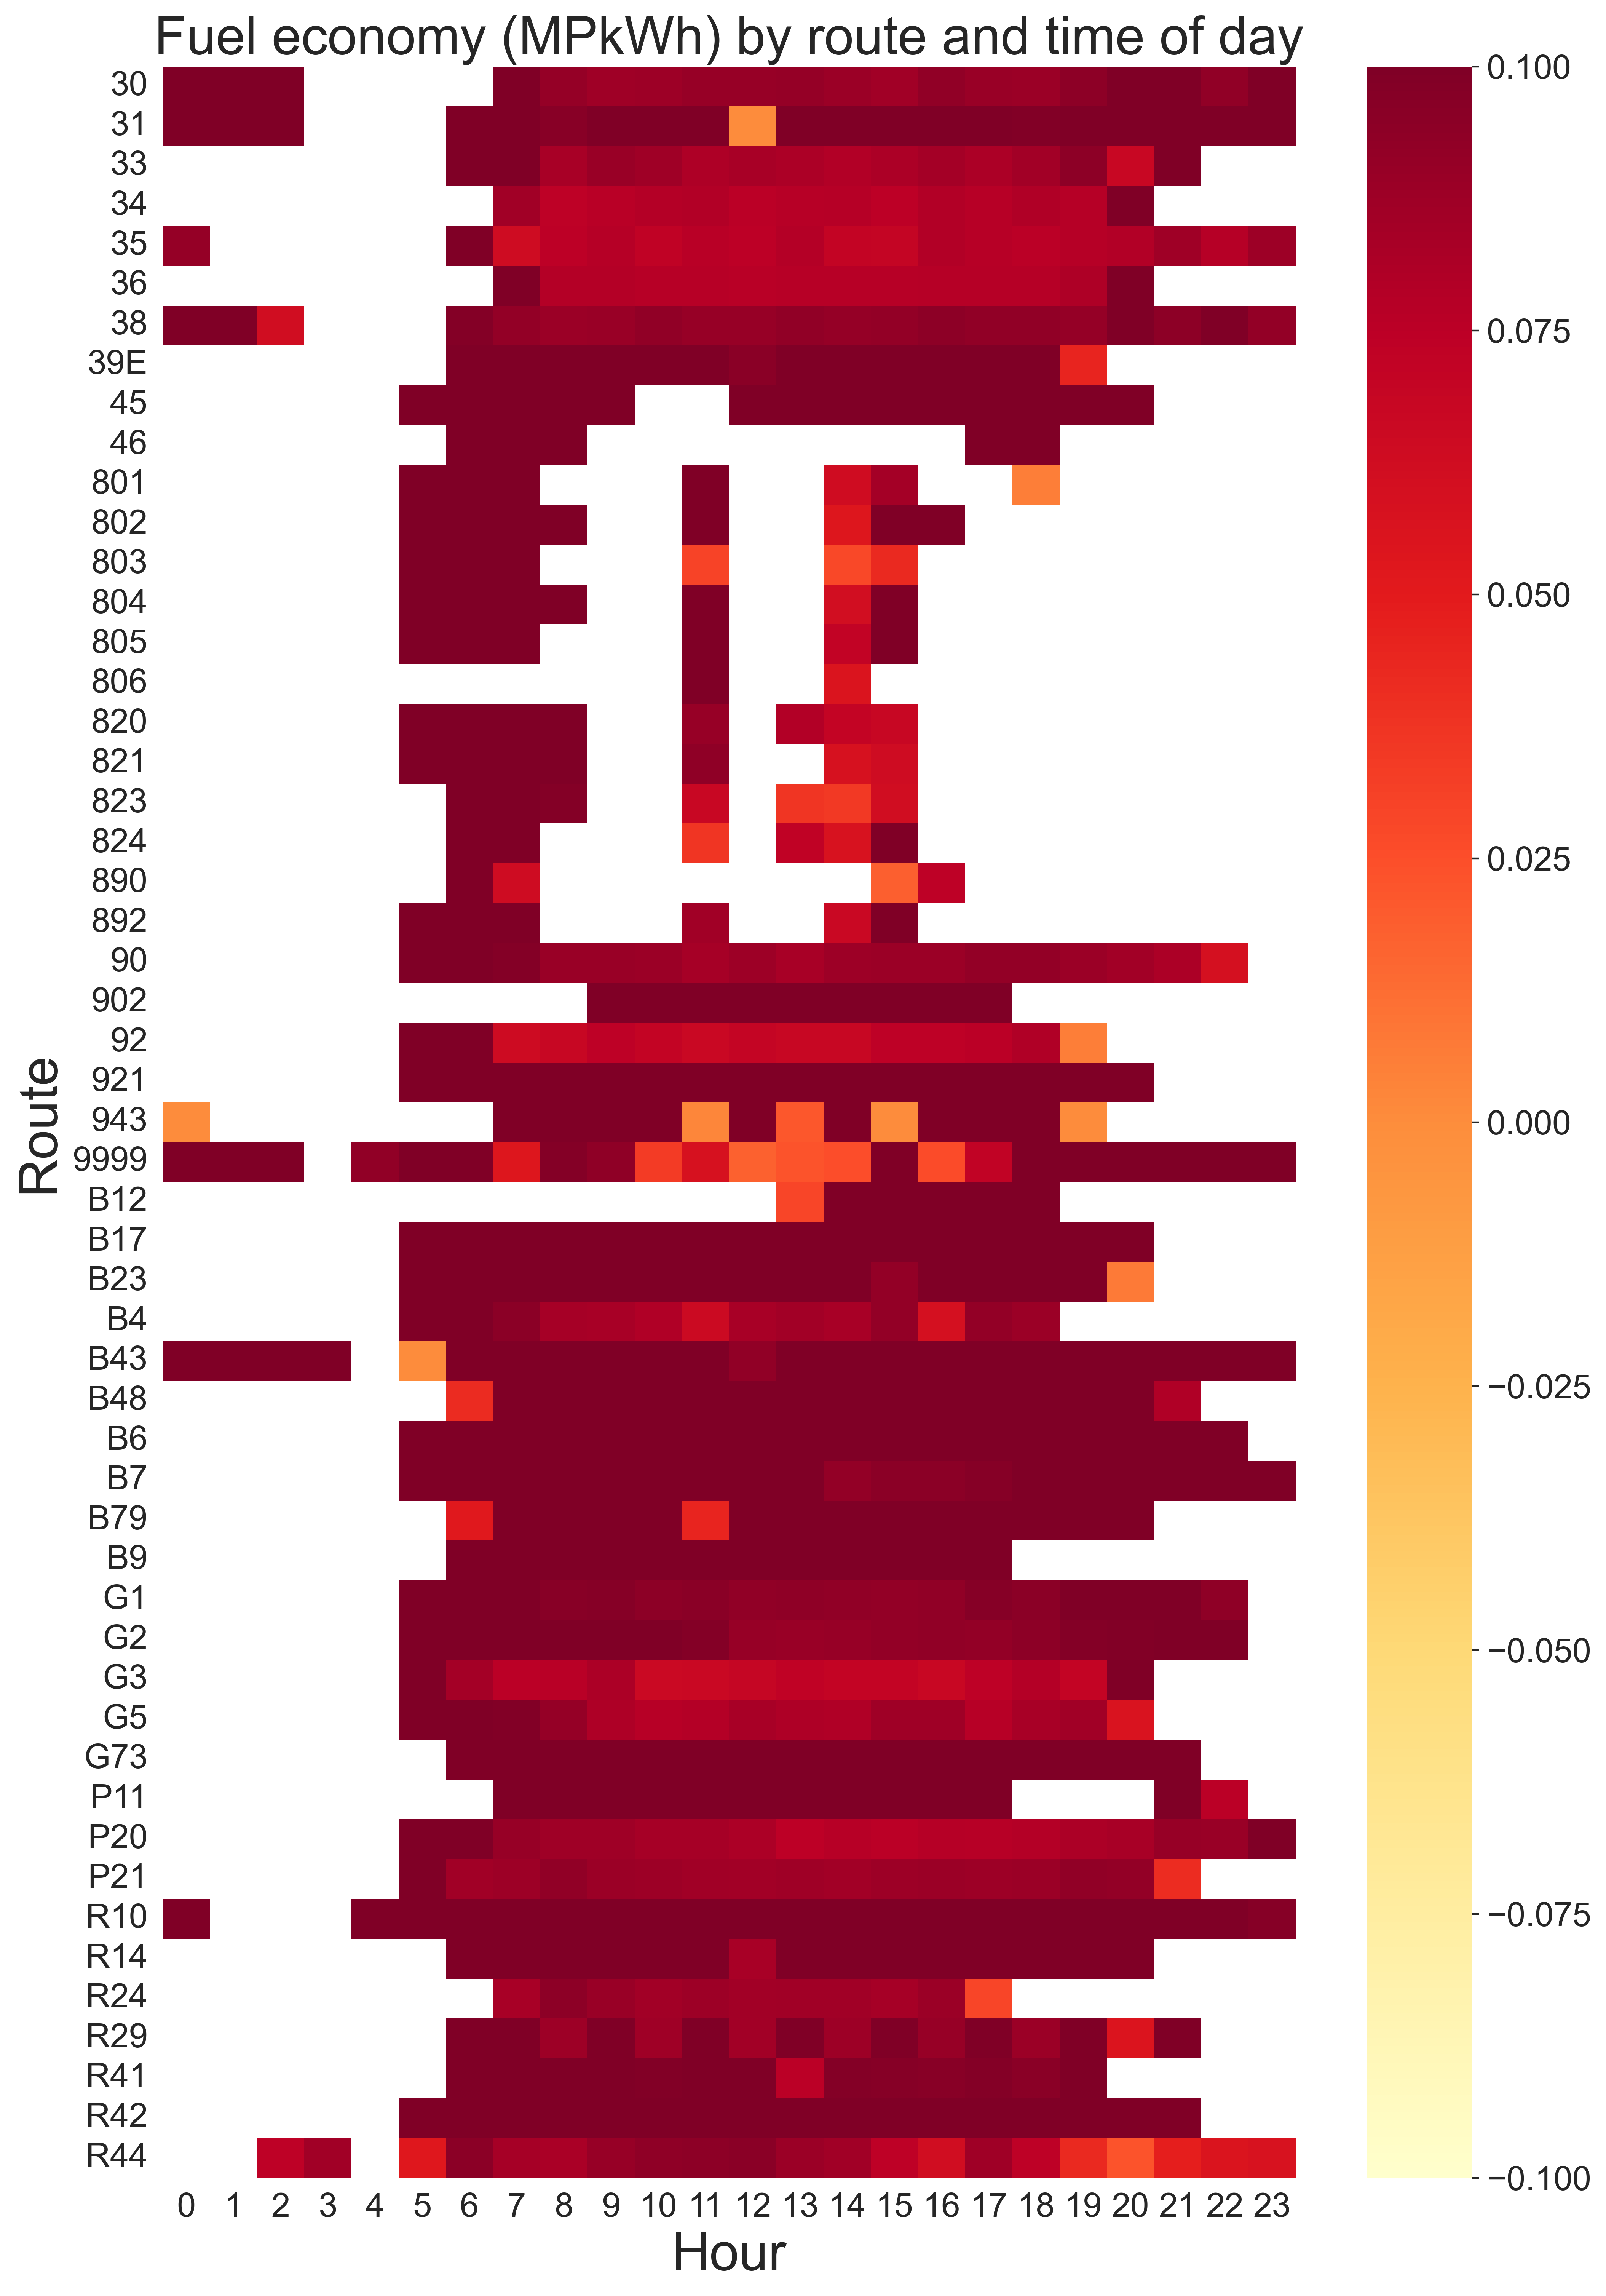

In [17]:
# Set the style of the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 18), dpi=400)
plt.ylabel('Route', fontsize=25)
plt.xlabel('Time of day', fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Create the heatmap
heatmap =sns.heatmap(df_model_aggregated_routes.pivot("Route", "Hour", "fuel_economy"), cmap="YlOrRd")

# Set the title of the plot
plt.title("Fuel economy (MPkWh) by route and time of day", fontsize=25)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

# Show the plot
plt.show()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\2816409389.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap = sns.heatmap(df_model_aggregated_routes.pivot("Route", "Hour", "energy_intensity"), cmap="YlOrRd")


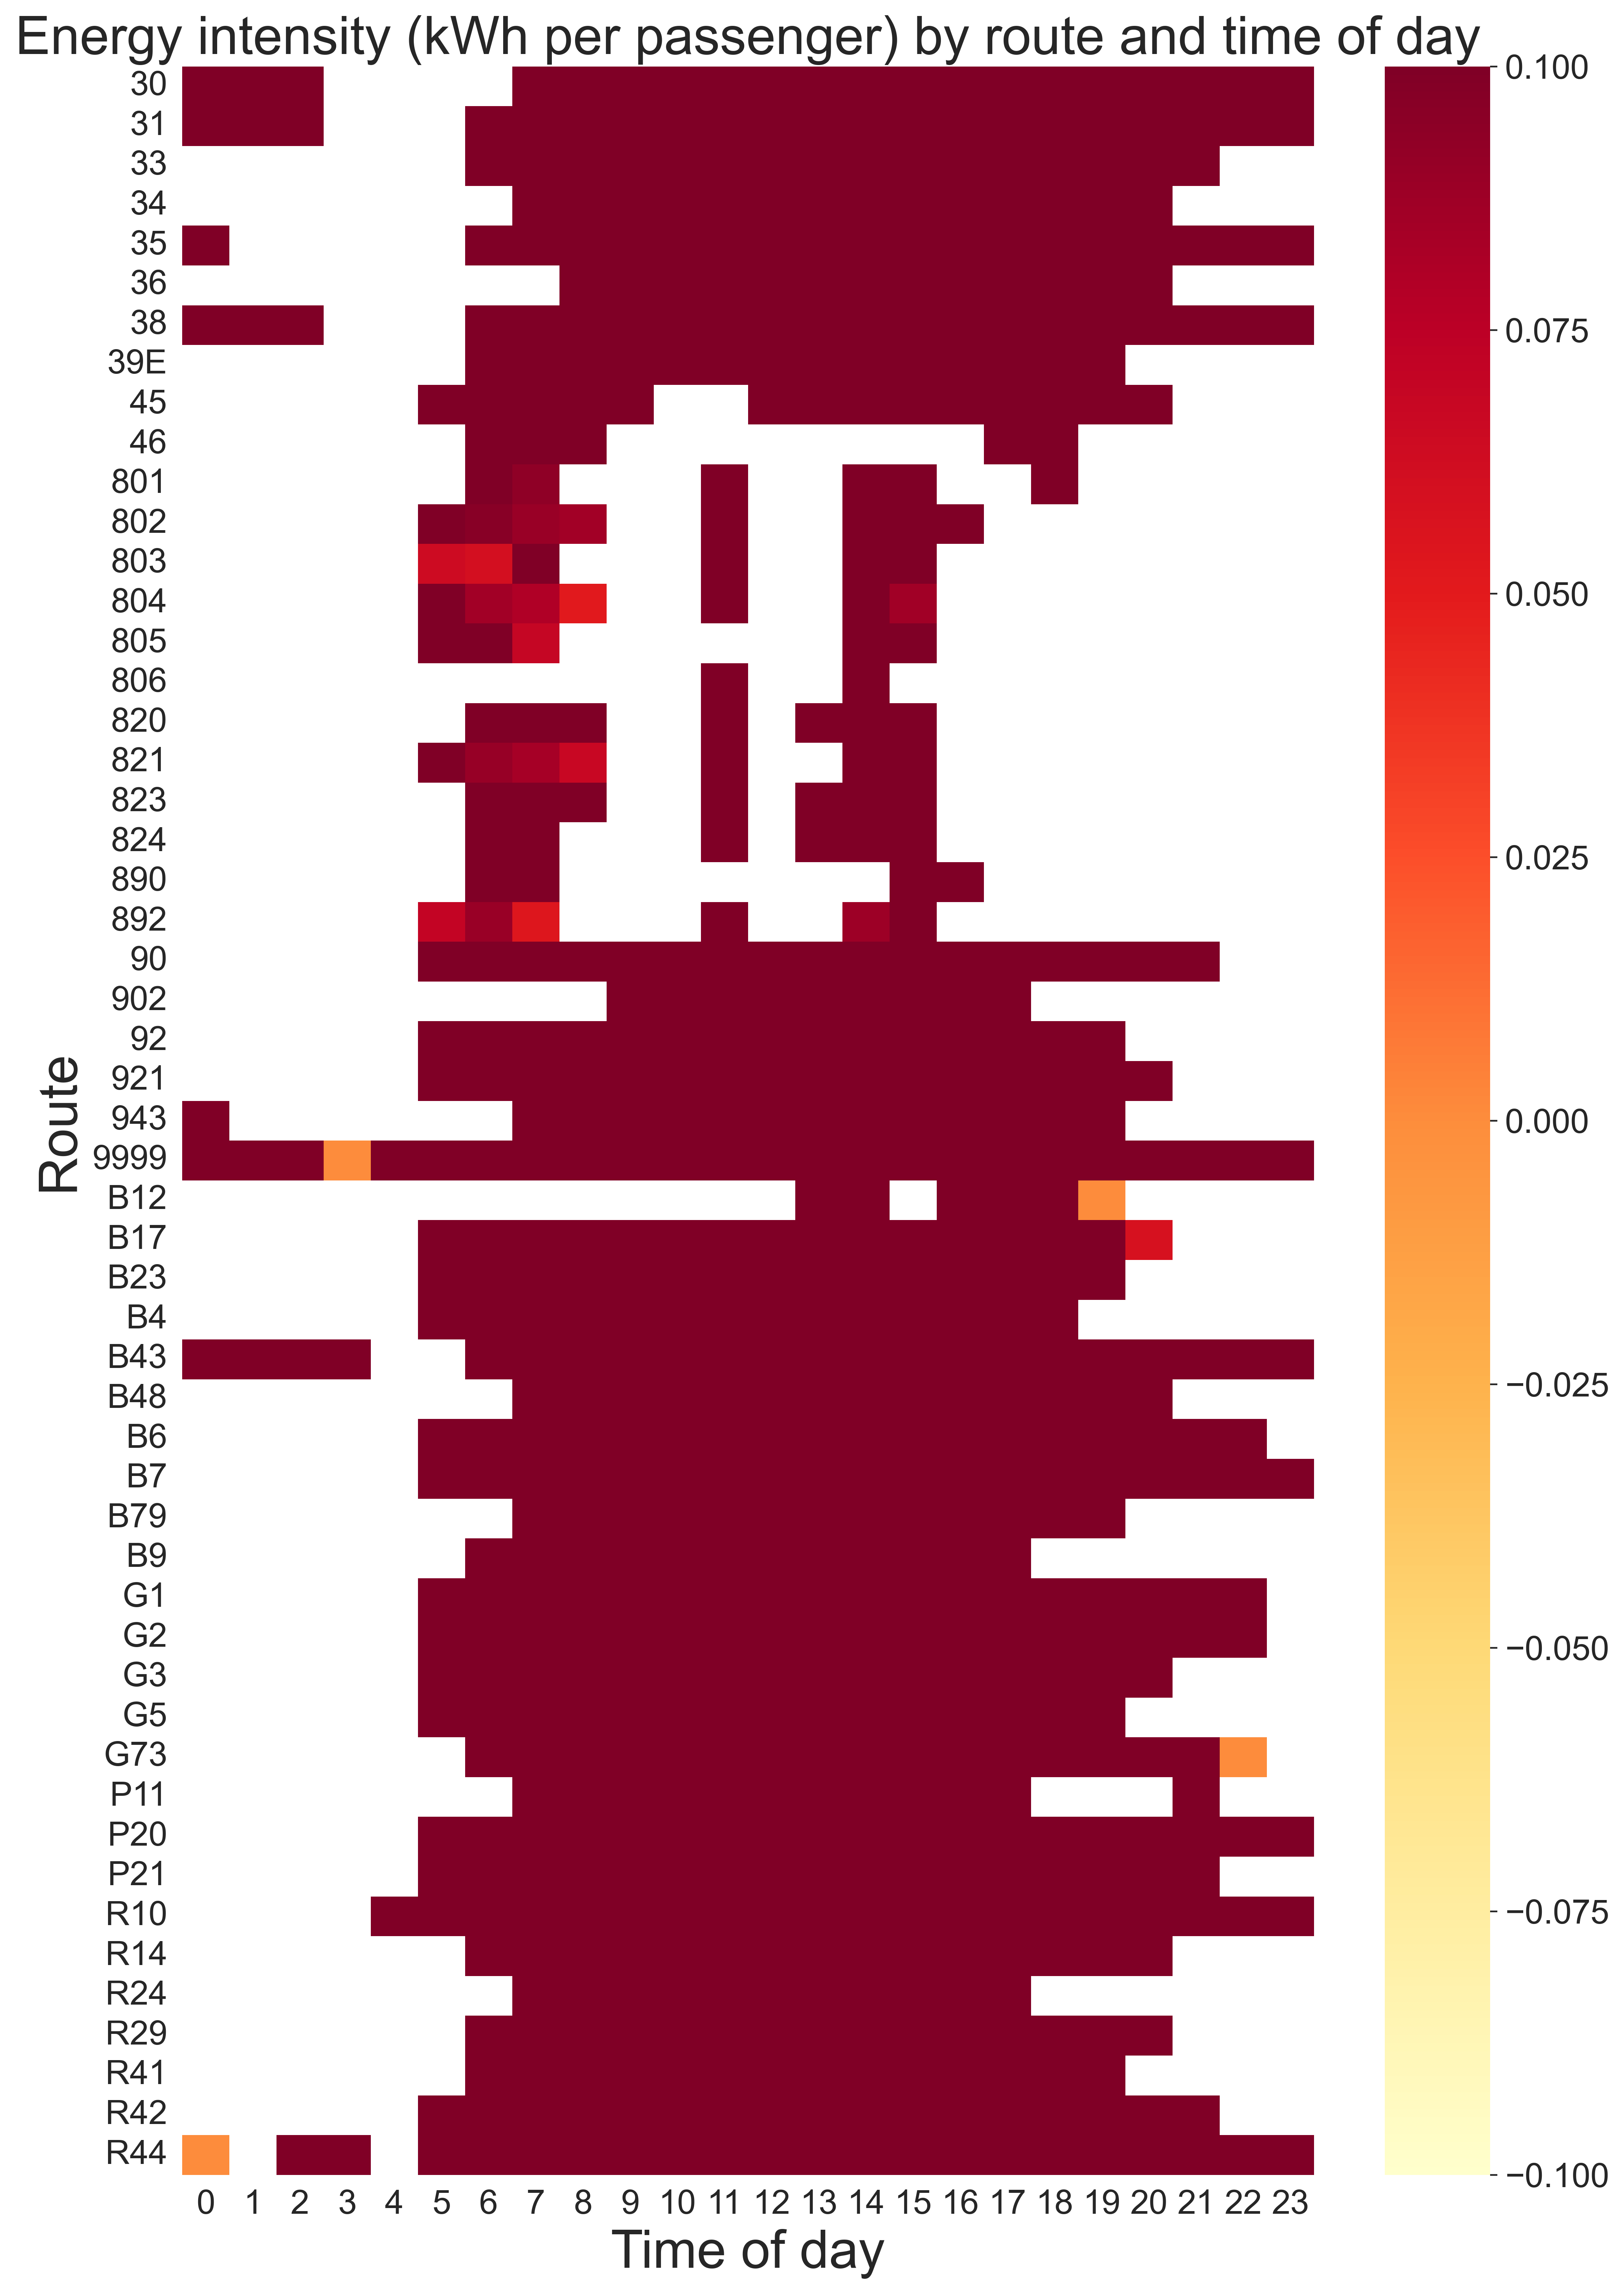

In [18]:
# Set the style of the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 18), dpi=400)


# Create the heatmap
heatmap = sns.heatmap(df_model_aggregated_routes.pivot("Route", "Hour", "energy_intensity"), cmap="YlOrRd")
plt.ylabel('Route', fontsize=25)
plt.xlabel('Time of day', fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)


# Set the title of the plot
plt.title("Energy intensity (kWh per passenger) by route and time of day", fontsize=25)

# Show the plot
plt.show()

In [19]:
df_model_aggregated_routes.columns

Index(['Route', 'Hour', 'Energy', 'dist', 'Onboard', 'Powertrain',
       'VehicleModel', 'fuel_economy', 'energy_intensity'],
      dtype='object')

In [20]:
# Preparation for monthly plotting
df_model_aggregated_routes_daily = df_kwh.groupby(['Route','Date']).agg({'Energy': ['sum'],'dist': ['sum'],'Onboard':['sum'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated_routes_daily.columns = df_model_aggregated_routes_daily.columns.droplevel(1)
df_model_aggregated_routes_daily['Date'] = pd.to_datetime(df_model_aggregated_routes_daily['Date'])
df_model_aggregated_routes_daily['Route'] = df_model_aggregated_routes_daily['Route'].str.replace("X","")
df_model_aggregated_routes_daily['Route'] = df_model_aggregated_routes_daily['Route'].str.replace("(","")
df_model_aggregated_routes_daily['Route'] = df_model_aggregated_routes_daily['Route'].str.replace(")","")

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\1829833832.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes_daily['Route'] = df_model_aggregated_routes_daily['Route'].str.replace("(","")
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\1829833832.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes_daily['Route'] = df_model_aggregated_routes_daily['Route'].str.replace(")","")


In [21]:
df_model_aggregated_routes_daily = df_model_aggregated_routes_daily.groupby(['Route','Date']).agg({'Energy': ['mean'],'dist': ['mean'],'Onboard':['mean'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated_routes_daily.columns = df_model_aggregated_routes_daily.columns.droplevel(1)
df_model_aggregated_routes_daily['fuel_economy']=df_model_aggregated_routes_daily['dist']/df_model_aggregated_routes_daily['Energy']
df_model_aggregated_routes_daily['energy_intensity']=df_model_aggregated_routes_daily['Energy']/df_model_aggregated_routes_daily['Onboard']

In [22]:
# Remove one bad points for route 31
df_model_aggregated_routes_daily=df_model_aggregated_routes_daily.loc[df_model_aggregated_routes_daily['Energy']<1000]

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\1705276135.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mean_energy_sorted.index, rotation=90)


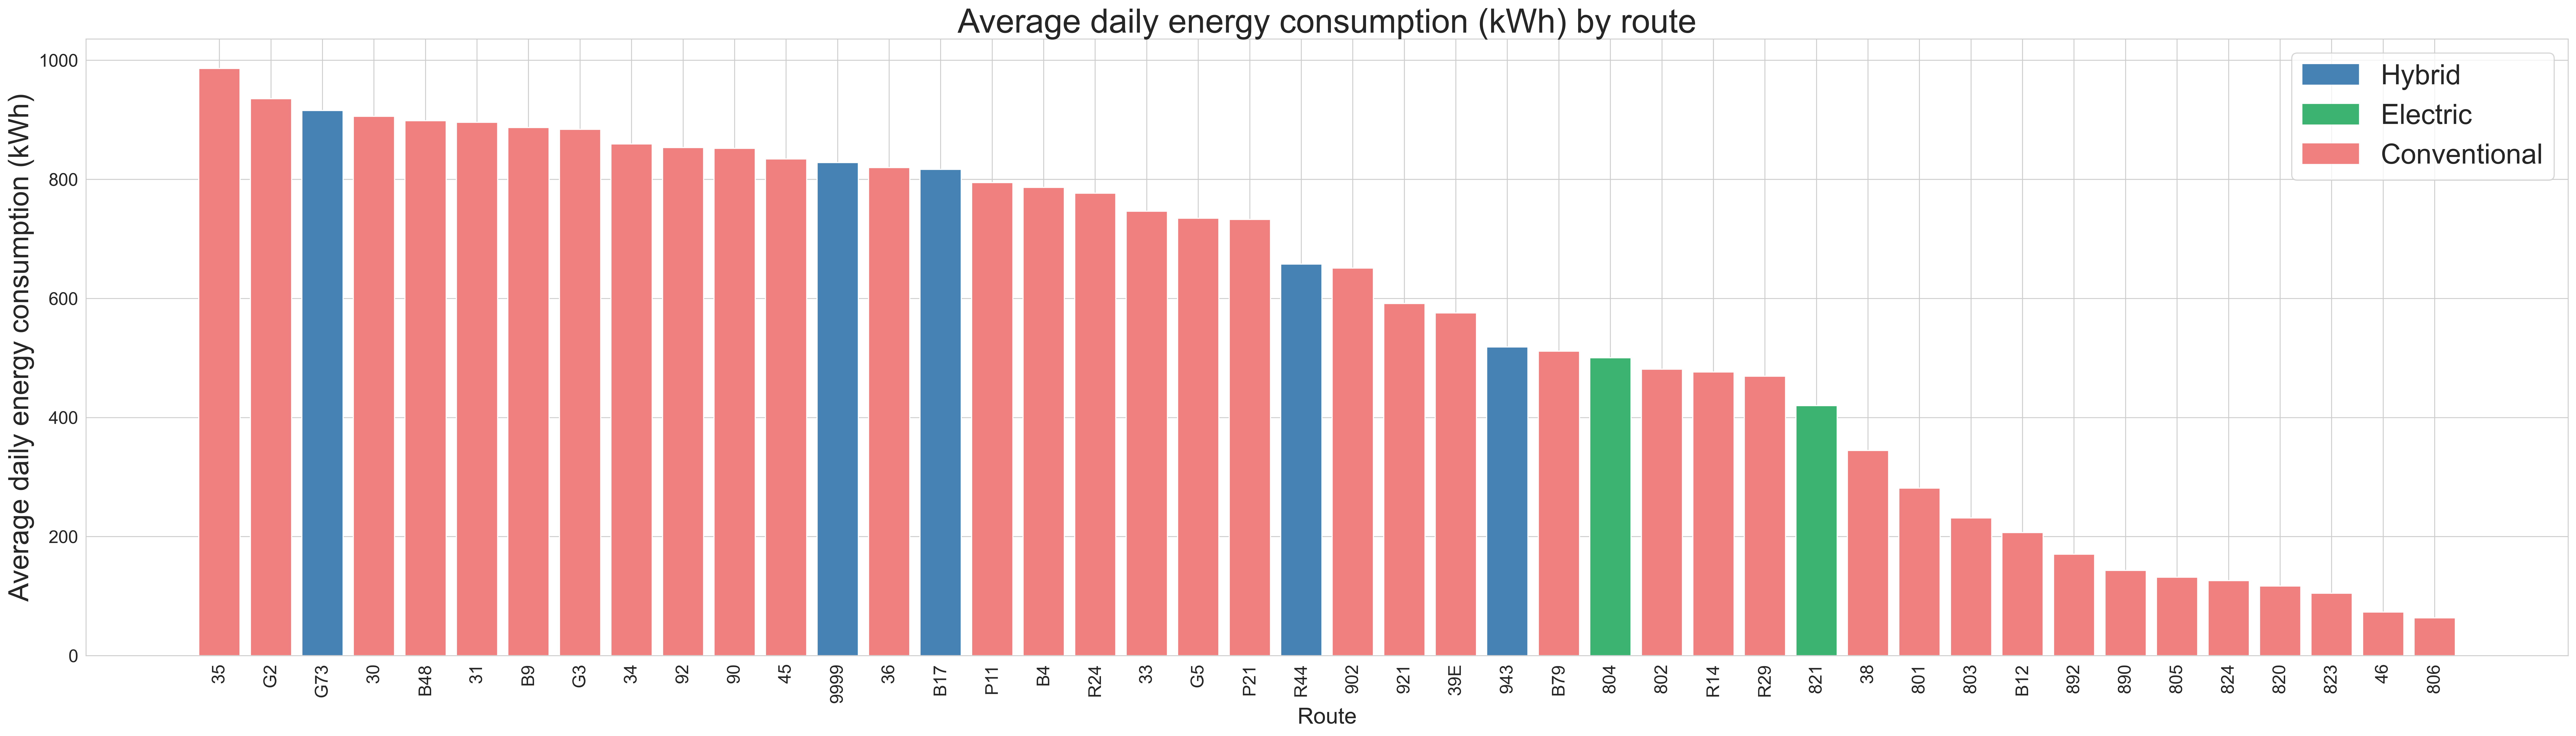

In [23]:
fig, ax = plt.subplots(figsize=(40, 10), dpi=400)
mean_energy = df_model_aggregated_routes_daily.groupby('Route')['Energy'].mean()
mean_energy_sorted = mean_energy.sort_values(ascending=False)
colors = []
labels = []
color_label_map = {'conventional': ('lightcoral', 'Conventional'), 'hybrid': ('steelblue', 'Hybrid'), 'electric': ('mediumseagreen', 'Electric')}

for route in mean_energy_sorted.index:
    # Find the most repeated VehicleModel for the current route
    most_repeated_vehicle_model = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['Route'] == route]['VehicleModel'].value_counts().idxmax()
    
    # Get the powertrain for the most repeated VehicleModel
    powertrain = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['VehicleModel'] == most_repeated_vehicle_model]['Powertrain'].iloc[0]
    
    color, label = color_label_map[powertrain]
    colors.append(color)
    labels.append(label)

ax.bar(mean_energy_sorted.index, mean_energy_sorted.values, color=colors)
ax.set_xticklabels(mean_energy_sorted.index, rotation=90)

# Create unique color patches and labels for legend
unique_colors_labels = list(set(zip(colors, labels)))
legend_patches = [patches.Patch(color=color, label=label) for color, label in unique_colors_labels]
ax.legend(handles=legend_patches, loc='upper right', fontsize=25)

ax.set_xlabel('Route', fontsize=20)
ax.set_ylabel('Average daily energy consumption (kWh)', fontsize=25)
ax.set_title('Average daily energy consumption (kWh) by route', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\3702788209.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mean_fuel_economy_sorted.index, rotation=90)


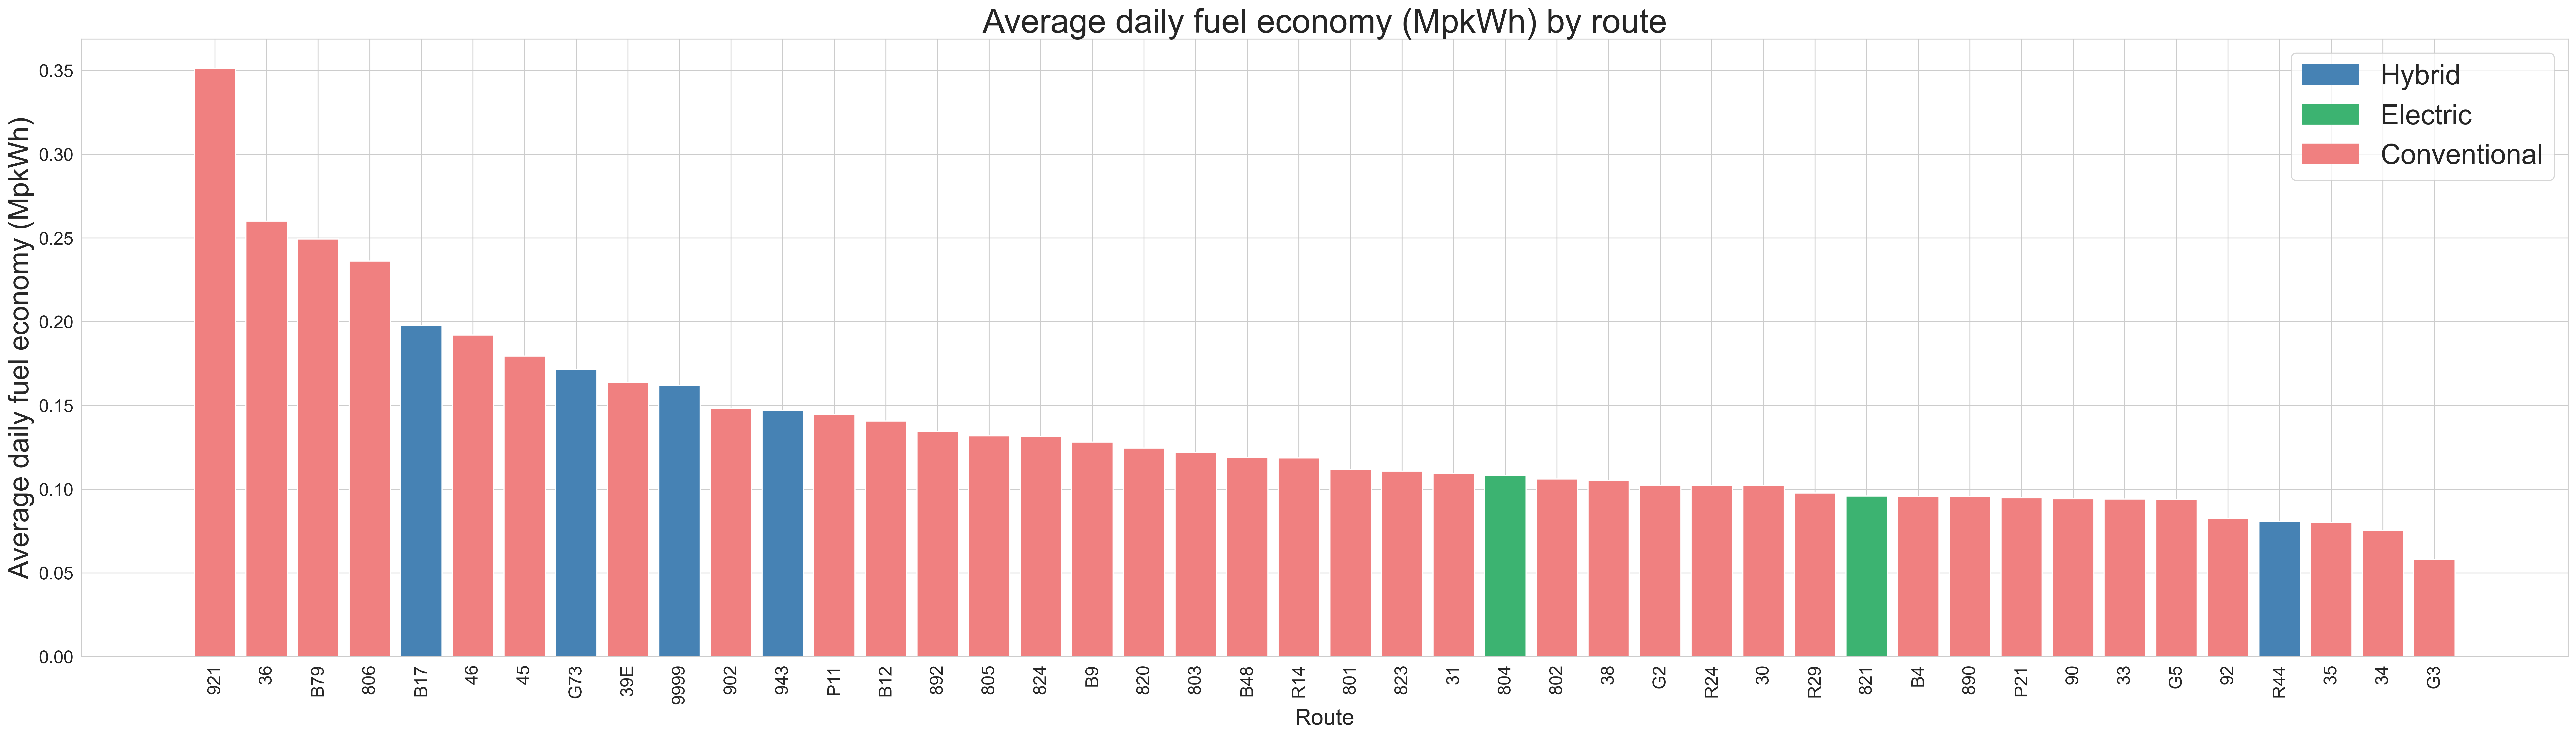

In [24]:
fig, ax = plt.subplots(figsize=(40, 10), dpi=400)
mean_fuel_economy = df_model_aggregated_routes_daily.groupby('Route')['fuel_economy'].mean()
mean_fuel_economy_sorted = mean_fuel_economy.sort_values(ascending=False)
colors = []
labels = []
color_label_map = {'conventional': ('lightcoral', 'Conventional'), 'hybrid': ('steelblue', 'Hybrid'), 'electric': ('mediumseagreen', 'Electric')}

for route in mean_fuel_economy_sorted.index:
    # Find the most repeated VehicleModel for the current route
    most_repeated_vehicle_model = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['Route'] == route]['VehicleModel'].value_counts().idxmax()
    
    # Get the powertrain for the most repeated VehicleModel
    powertrain = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['VehicleModel'] == most_repeated_vehicle_model]['Powertrain'].iloc[0]
    
    color, label = color_label_map[powertrain]
    colors.append(color)
    labels.append(label)

ax.bar(mean_fuel_economy_sorted.index, mean_fuel_economy_sorted.values, color=colors)
ax.set_xticklabels(mean_fuel_economy_sorted.index, rotation=90)

# Create unique color patches and labels for legend
unique_colors_labels = list(set(zip(colors, labels)))
legend_patches = [patches.Patch(color=color, label=label) for color, label in unique_colors_labels]
ax.legend(handles=legend_patches, loc='upper right', fontsize=25)

ax.set_xlabel('Route', fontsize=20)
ax.set_ylabel('Average daily fuel economy (MpkWh)', fontsize=25)
ax.set_title('Average daily fuel economy (MpkWh) by route', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\236952869.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mean_energy_intensity_sorted.index, rotation=90)


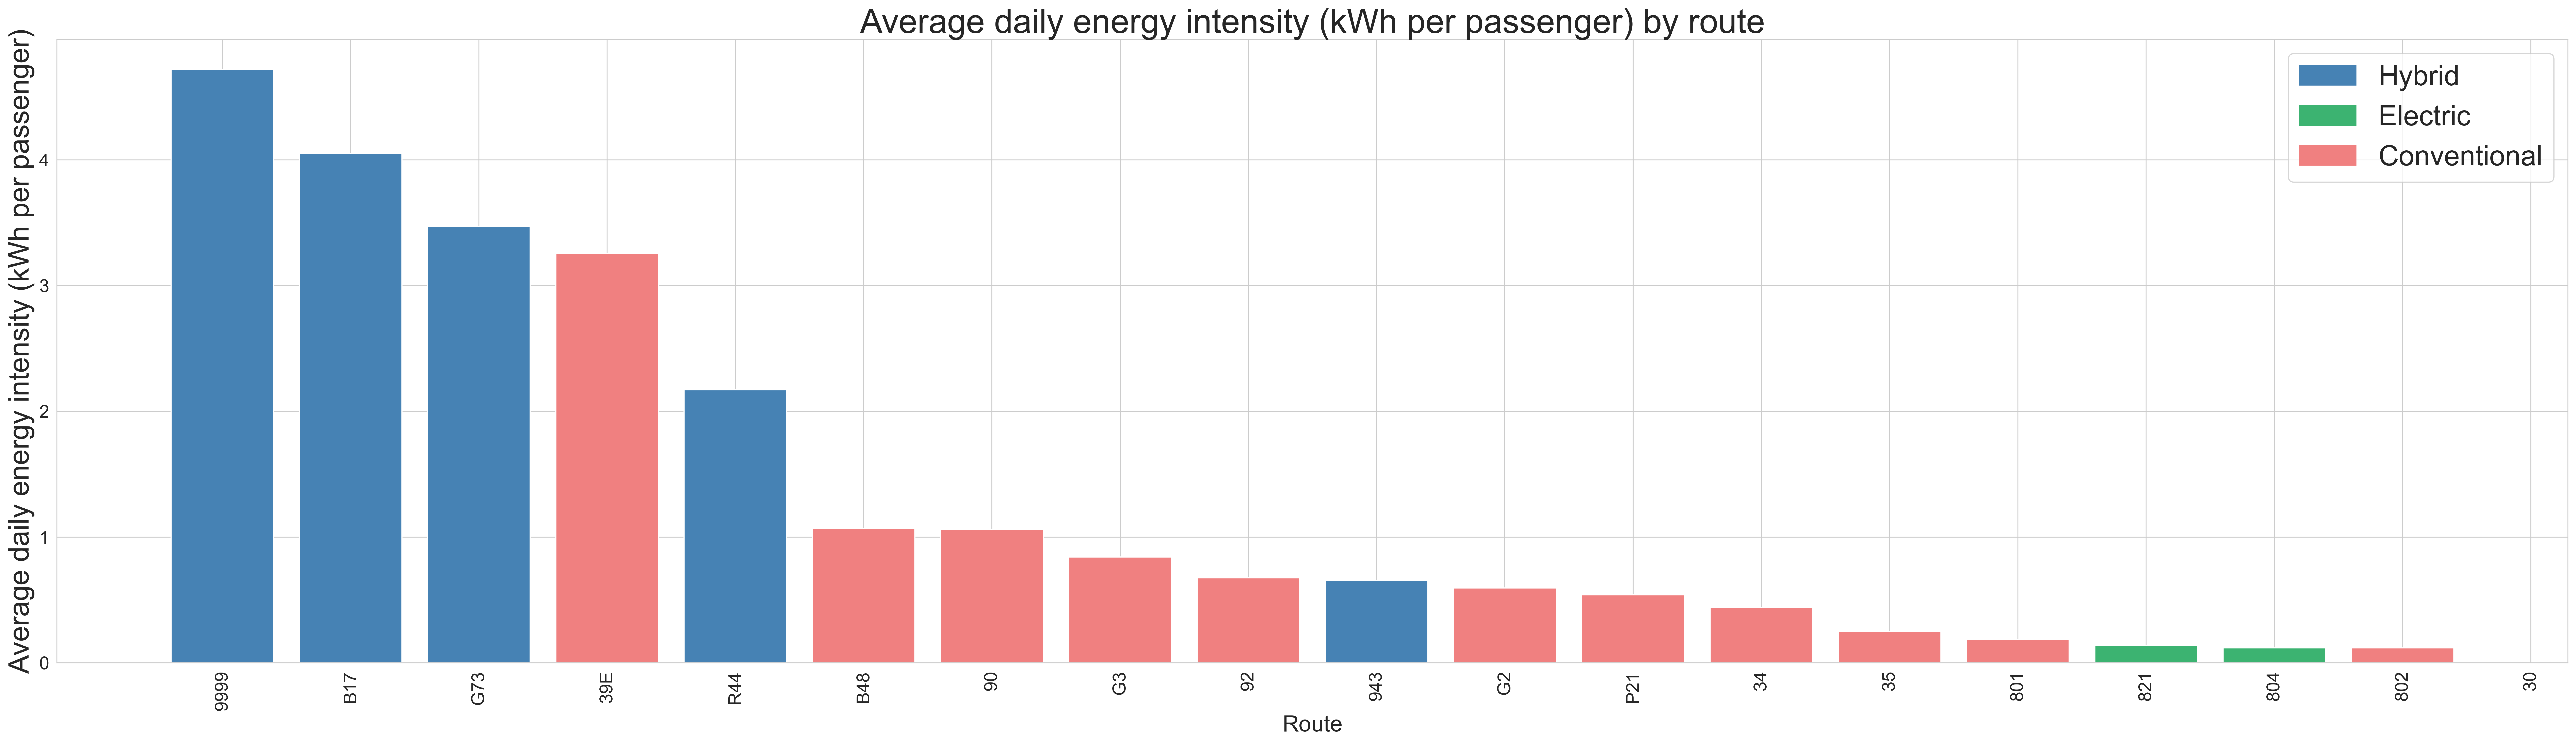

In [25]:
fig, ax = plt.subplots(figsize=(40, 10), dpi=400)
mean_energy_intensity = df_model_aggregated_routes_daily.groupby('Route')['energy_intensity'].mean()
mean_energy_intensity_sorted = mean_energy_intensity.sort_values(ascending=False)
colors = []
labels = []
color_label_map = {'conventional': ('lightcoral', 'Conventional'), 'hybrid': ('steelblue', 'Hybrid'), 'electric': ('mediumseagreen', 'Electric')}

for route in mean_energy_intensity_sorted.index:
    # Find the most repeated VehicleModel for the current route
    most_repeated_vehicle_model = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['Route'] == route]['VehicleModel'].value_counts().idxmax()
    
    # Get the powertrain for the most repeated VehicleModel
    powertrain = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['VehicleModel'] == most_repeated_vehicle_model]['Powertrain'].iloc[0]
    
    color, label = color_label_map[powertrain]
    colors.append(color)
    labels.append(label)

ax.bar(mean_energy_intensity_sorted.index, mean_energy_intensity_sorted.values, color=colors)
ax.set_xticklabels(mean_energy_intensity_sorted.index, rotation=90)

# Create unique color patches and labels for legend
unique_colors_labels = list(set(zip(colors, labels)))
legend_patches = [patches.Patch(color=color, label=label) for color, label in unique_colors_labels]
ax.legend(handles=legend_patches, loc='upper right', fontsize=25)

ax.set_xlabel('Route', fontsize=20)
ax.set_ylabel('Average daily energy intensity (kWh per passenger)', fontsize=25)
ax.set_title('Average daily energy intensity (kWh per passenger) by route', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [26]:
# Preparation for plotting ****gal
df_model_aggregated_routes = df_gal.groupby(['Route','Date' ,'Hour']).agg({'Energy': ['sum'],'dist': ['sum'],'Onboard':['sum'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated_routes.columns = df_model_aggregated_routes.columns.droplevel(1)
df_model_aggregated_routes['Date'] = pd.to_datetime(df_model_aggregated_routes['Date'])
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("X","")
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("(","")
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace(")","")

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\3975989120.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("(","")
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\3975989120.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace(")","")


In [27]:
df_model_aggregated_routes = df_model_aggregated_routes.groupby(['Route','Hour']).agg({'Energy': ['mean'],'dist': ['mean'],'Onboard':['mean'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated_routes.columns = df_model_aggregated_routes.columns.droplevel(1)
df_model_aggregated_routes['fuel_economy']=df_model_aggregated_routes['dist']/df_model_aggregated_routes['Energy']
df_model_aggregated_routes['energy_intensity']=df_model_aggregated_routes['Energy']/df_model_aggregated_routes['Onboard']

In [28]:
# Preparation for monthly plotting
df_model_aggregated_routes_daily = df_kwh.groupby(['Route','Date']).agg({'Energy': ['sum'],'dist': ['sum'],'Onboard':['sum'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated_routes_daily.columns = df_model_aggregated_routes_daily.columns.droplevel(1)
df_model_aggregated_routes_daily['Date'] = pd.to_datetime(df_model_aggregated_routes_daily['Date'])
df_model_aggregated_routes_daily['Route'] = df_model_aggregated_routes_daily['Route'].str.replace("X","")
df_model_aggregated_routes_daily['Route'] = df_model_aggregated_routes_daily['Route'].str.replace("(","")
df_model_aggregated_routes_daily['Route'] = df_model_aggregated_routes_daily['Route'].str.replace(")","")

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\1829833832.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes_daily['Route'] = df_model_aggregated_routes_daily['Route'].str.replace("(","")
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\1829833832.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes_daily['Route'] = df_model_aggregated_routes_daily['Route'].str.replace(")","")


In [29]:
df_model_aggregated_routes_daily = df_model_aggregated_routes_daily.groupby(['Route','Date']).agg({'Energy': ['mean'],'dist': ['mean'],'Onboard':['mean'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated_routes_daily.columns = df_model_aggregated_routes_daily.columns.droplevel(1)
df_model_aggregated_routes_daily['fuel_economy']=df_model_aggregated_routes_daily['dist']/df_model_aggregated_routes_daily['Energy']
df_model_aggregated_routes_daily['energy_intensity']=df_model_aggregated_routes_daily['Energy']/df_model_aggregated_routes_daily['Onboard']

In [30]:
# Remove one bad points for route 31
df_model_aggregated_routes_daily=df_model_aggregated_routes_daily.loc[df_model_aggregated_routes_daily['Energy']<1000]

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\2047985534.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mean_energy_sorted.index, rotation=90)


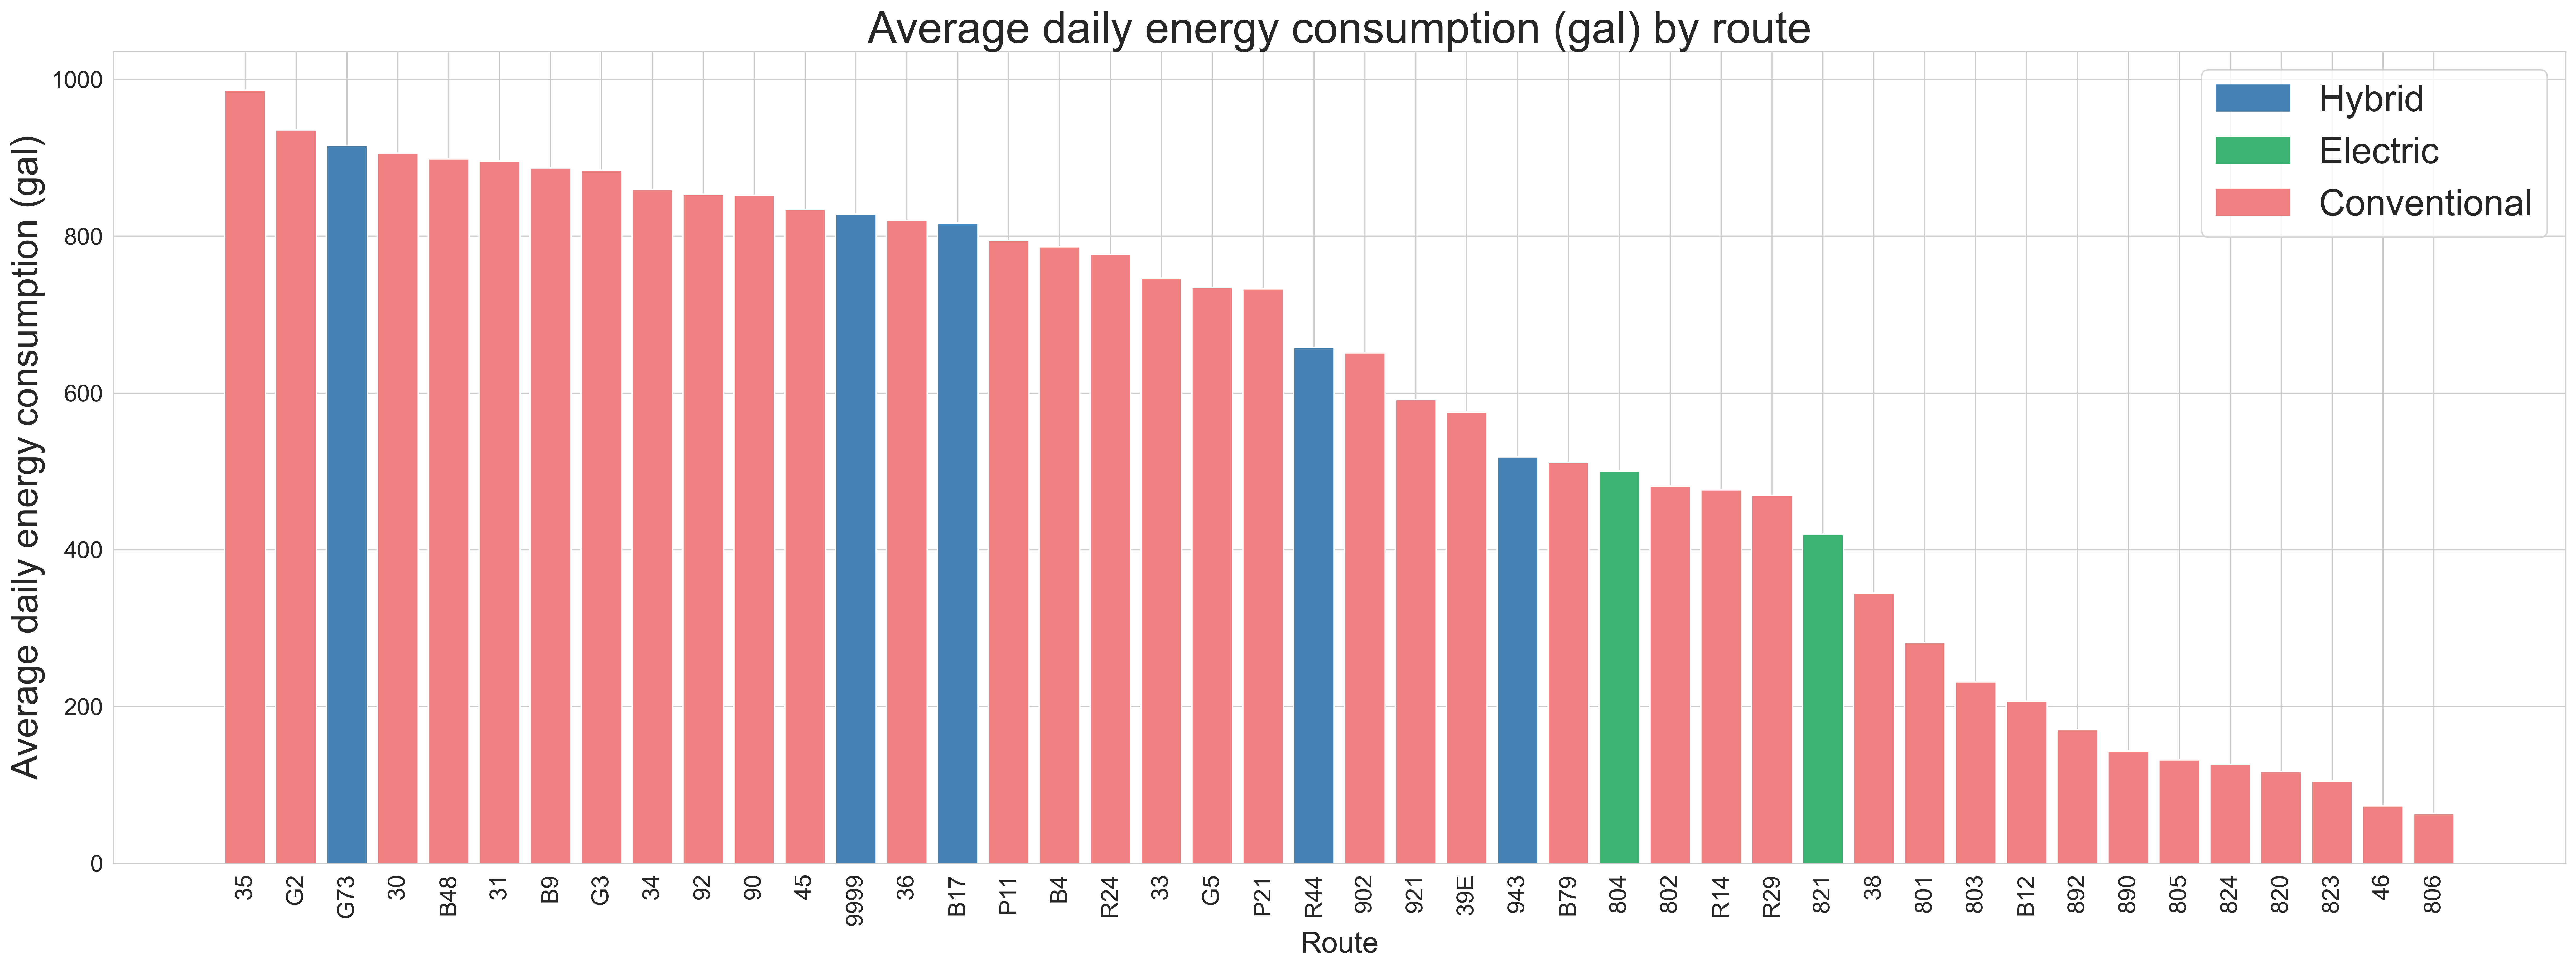

In [31]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=400)
mean_energy = df_model_aggregated_routes_daily.groupby('Route')['Energy'].mean()
mean_energy_sorted = mean_energy.sort_values(ascending=False)
colors = []
labels = []
color_label_map = {'conventional': ('lightcoral', 'Conventional'), 'hybrid': ('steelblue', 'Hybrid'), 'electric': ('mediumseagreen', 'Electric')}

for route in mean_energy_sorted.index:
    # Find the most repeated VehicleModel for the current route
    most_repeated_vehicle_model = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['Route'] == route]['VehicleModel'].value_counts().idxmax()
    
    # Get the powertrain for the most repeated VehicleModel
    powertrain = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['VehicleModel'] == most_repeated_vehicle_model]['Powertrain'].iloc[0]
    
    color, label = color_label_map[powertrain]
    colors.append(color)
    labels.append(label)

ax.bar(mean_energy_sorted.index, mean_energy_sorted.values, color=colors)
ax.set_xticklabels(mean_energy_sorted.index, rotation=90)

# Create unique color patches and labels for legend
unique_colors_labels = list(set(zip(colors, labels)))
legend_patches = [patches.Patch(color=color, label=label) for color, label in unique_colors_labels]
ax.legend(handles=legend_patches, loc='upper right', fontsize=25)

ax.set_xlabel('Route', fontsize=20)
ax.set_ylabel('Average daily energy consumption (gal)', fontsize=25)
ax.set_title('Average daily energy consumption (gal) by route', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\4086797695.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mean_fuel_economy_sorted.index, rotation=90)


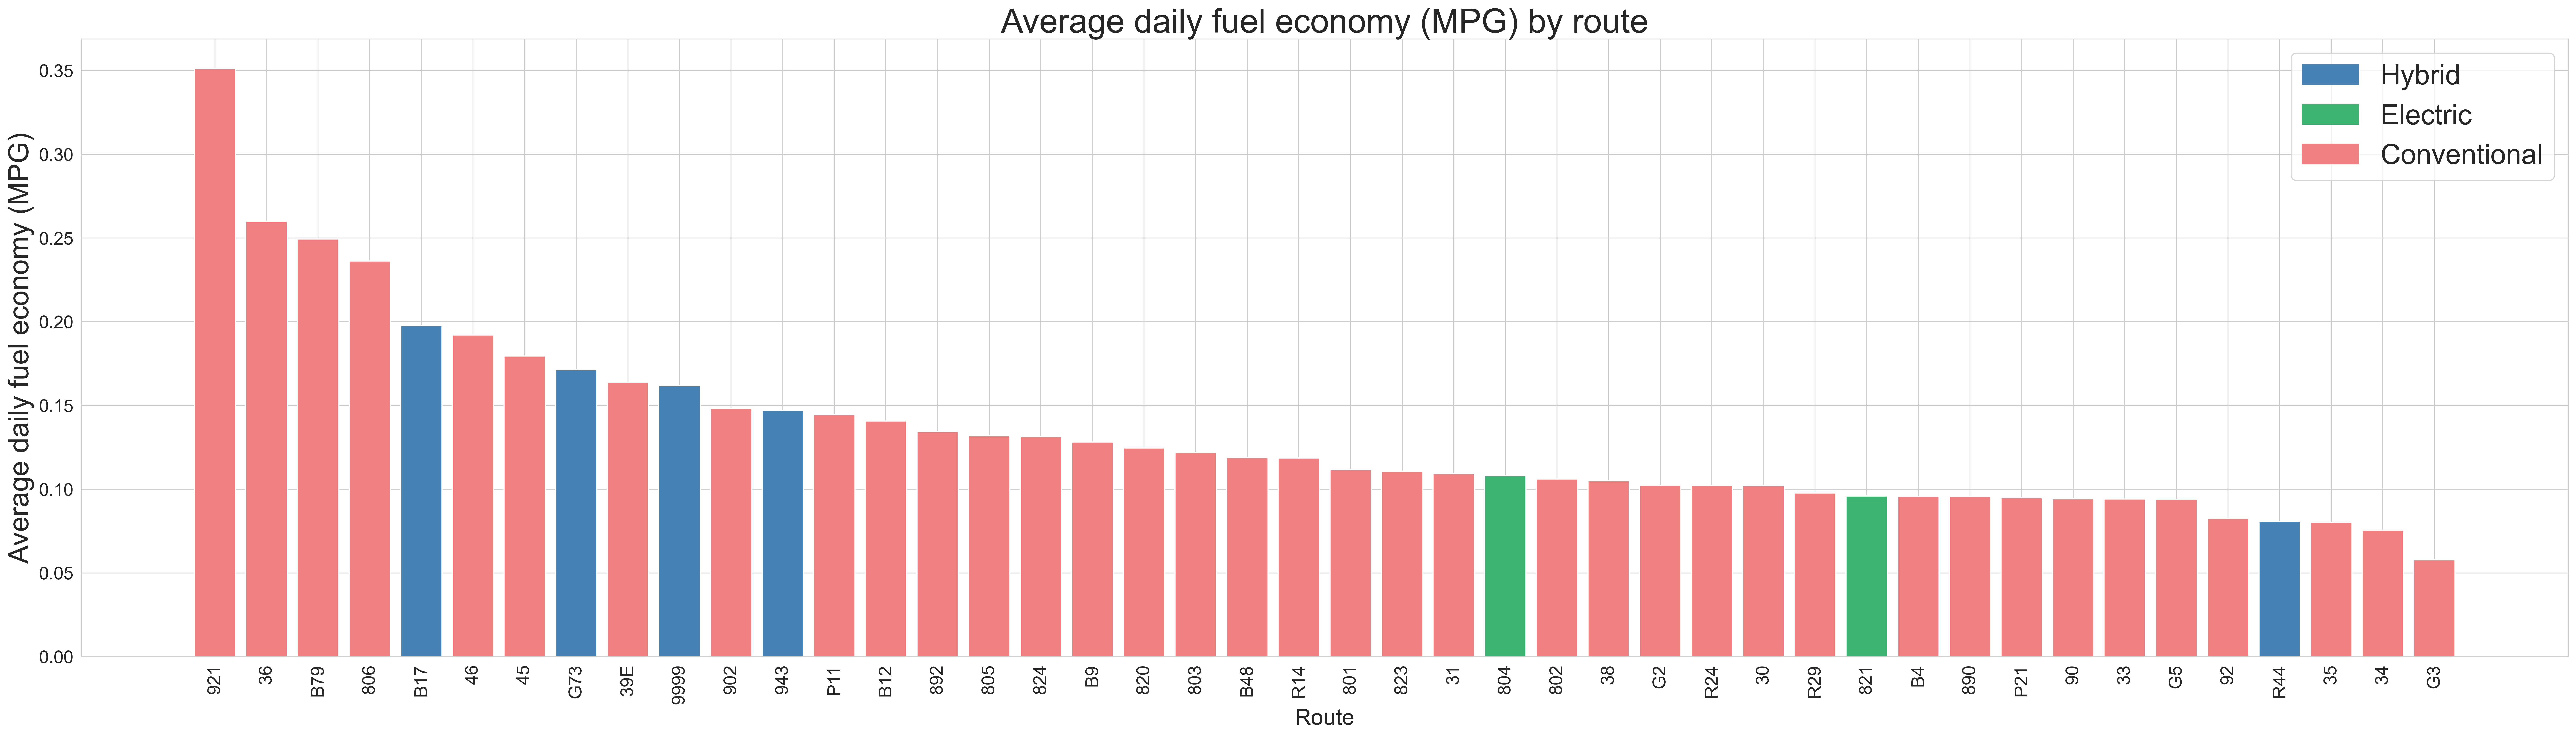

In [32]:
fig, ax = plt.subplots(figsize=(40, 10), dpi=400)
mean_fuel_economy = df_model_aggregated_routes_daily.groupby('Route')['fuel_economy'].mean()
mean_fuel_economy_sorted = mean_fuel_economy.sort_values(ascending=False)
colors = []
labels = []
color_label_map = {'conventional': ('lightcoral', 'Conventional'), 'hybrid': ('steelblue', 'Hybrid'), 'electric': ('mediumseagreen', 'Electric')}

for route in mean_fuel_economy_sorted.index:
    # Find the most repeated VehicleModel for the current route
    most_repeated_vehicle_model = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['Route'] == route]['VehicleModel'].value_counts().idxmax()
    
    # Get the powertrain for the most repeated VehicleModel
    powertrain = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['VehicleModel'] == most_repeated_vehicle_model]['Powertrain'].iloc[0]
    
    color, label = color_label_map[powertrain]
    colors.append(color)
    labels.append(label)

ax.bar(mean_fuel_economy_sorted.index, mean_fuel_economy_sorted.values, color=colors)
ax.set_xticklabels(mean_fuel_economy_sorted.index, rotation=90)

# Create unique color patches and labels for legend
unique_colors_labels = list(set(zip(colors, labels)))
legend_patches = [patches.Patch(color=color, label=label) for color, label in unique_colors_labels]
ax.legend(handles=legend_patches, loc='upper right', fontsize=25)

ax.set_xlabel('Route', fontsize=20)
ax.set_ylabel('Average daily fuel economy (MPG)', fontsize=25)
ax.set_title('Average daily fuel economy (MPG) by route', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23160\140125491.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mean_energy_intensity_sorted.index, rotation=90)


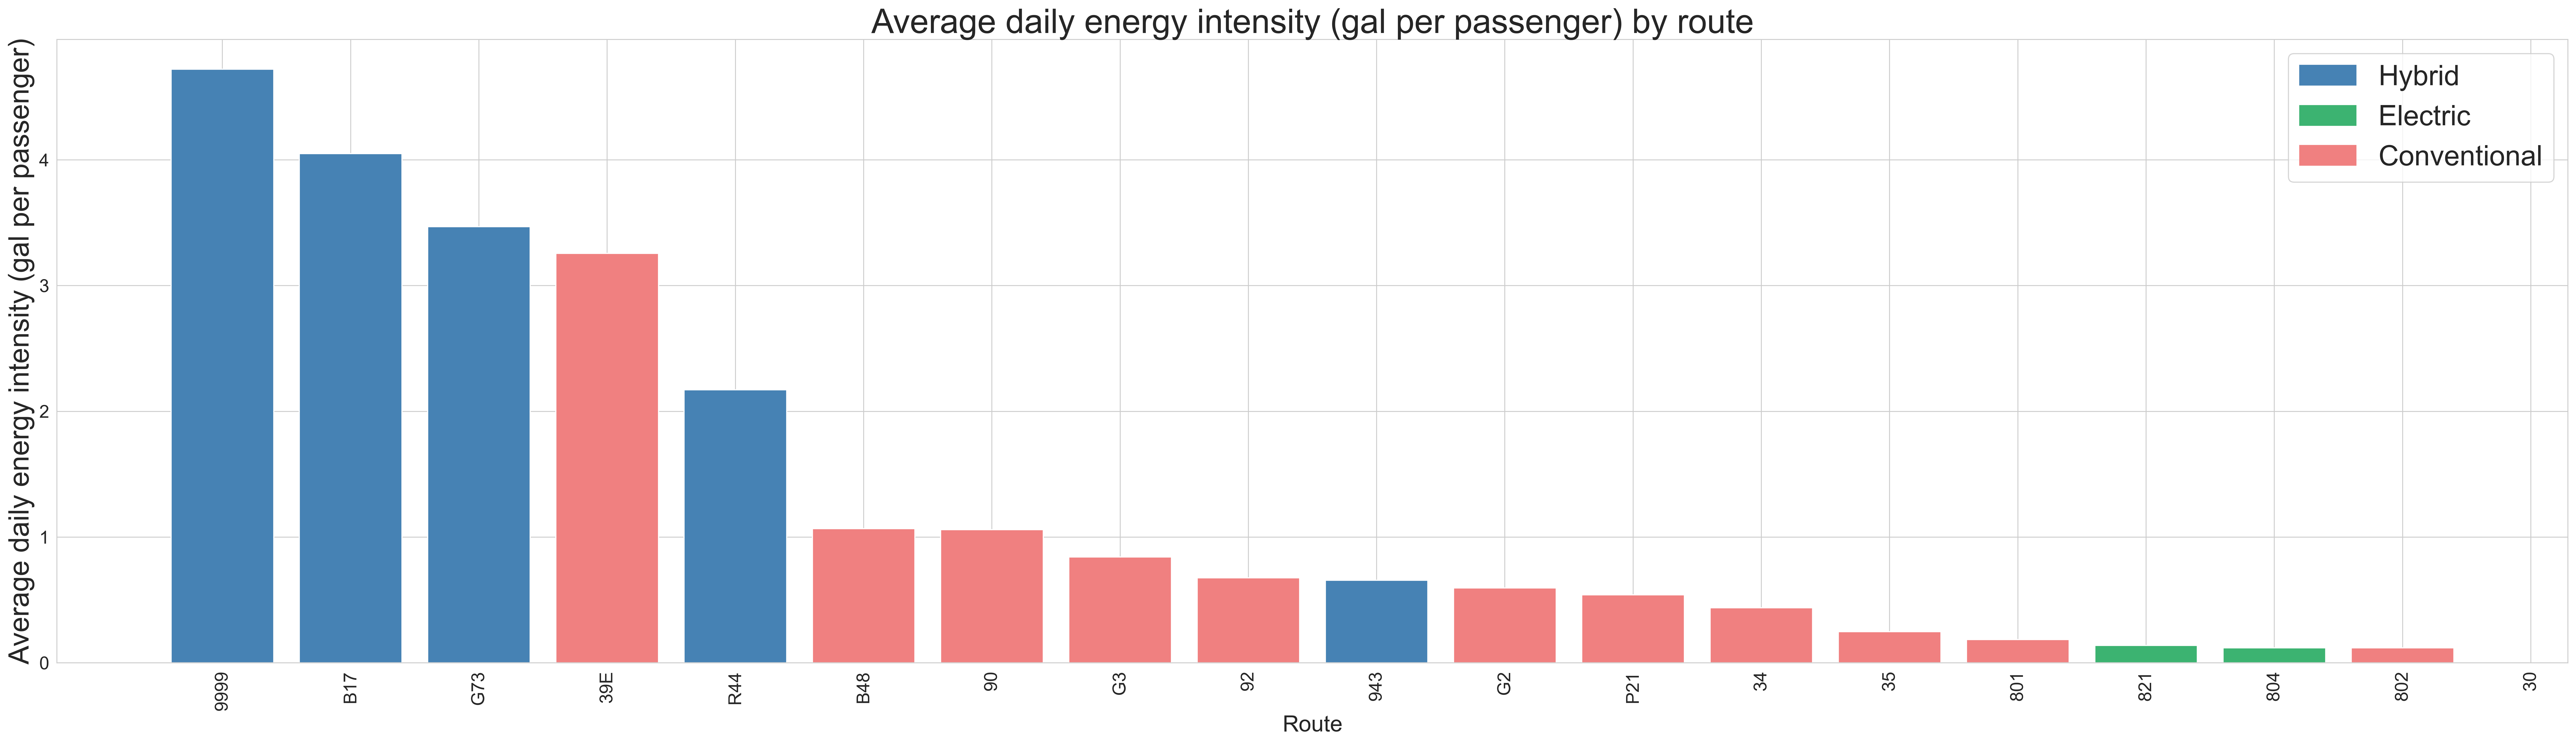

In [33]:
fig, ax = plt.subplots(figsize=(40, 10), dpi=400)
mean_energy_intensity = df_model_aggregated_routes_daily.groupby('Route')['energy_intensity'].mean()
mean_energy_intensity_sorted = mean_energy_intensity.sort_values(ascending=False)
colors = []
labels = []
color_label_map = {'conventional': ('lightcoral', 'Conventional'), 'hybrid': ('steelblue', 'Hybrid'), 'electric': ('mediumseagreen', 'Electric')}

for route in mean_energy_intensity_sorted.index:
    # Find the most repeated VehicleModel for the current route
    most_repeated_vehicle_model = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['Route'] == route]['VehicleModel'].value_counts().idxmax()
    
    # Get the powertrain for the most repeated VehicleModel
    powertrain = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['VehicleModel'] == most_repeated_vehicle_model]['Powertrain'].iloc[0]
    
    color, label = color_label_map[powertrain]
    colors.append(color)
    labels.append(label)

ax.bar(mean_energy_intensity_sorted.index, mean_energy_intensity_sorted.values, color=colors)
ax.set_xticklabels(mean_energy_intensity_sorted.index, rotation=90)

# Create unique color patches and labels for legend
unique_colors_labels = list(set(zip(colors, labels)))
legend_patches = [patches.Patch(color=color, label=label) for color, label in unique_colors_labels]
ax.legend(handles=legend_patches, loc='upper right', fontsize=25)

ax.set_xlabel('Route', fontsize=20)
ax.set_ylabel('Average daily energy intensity (gal per passenger)', fontsize=25)
ax.set_title('Average daily energy intensity (gal per passenger) by route', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [34]:
# Create a pivot table
pivot_df = df_model_aggregated_routes_daily.pivot_table(values='Energy', index='Route', columns='Powertrain', aggfunc='mean')

# Fill NaN values with 0
pivot_df = pivot_df.fillna(0)

# Sort the DataFrame by the sum of energies
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]


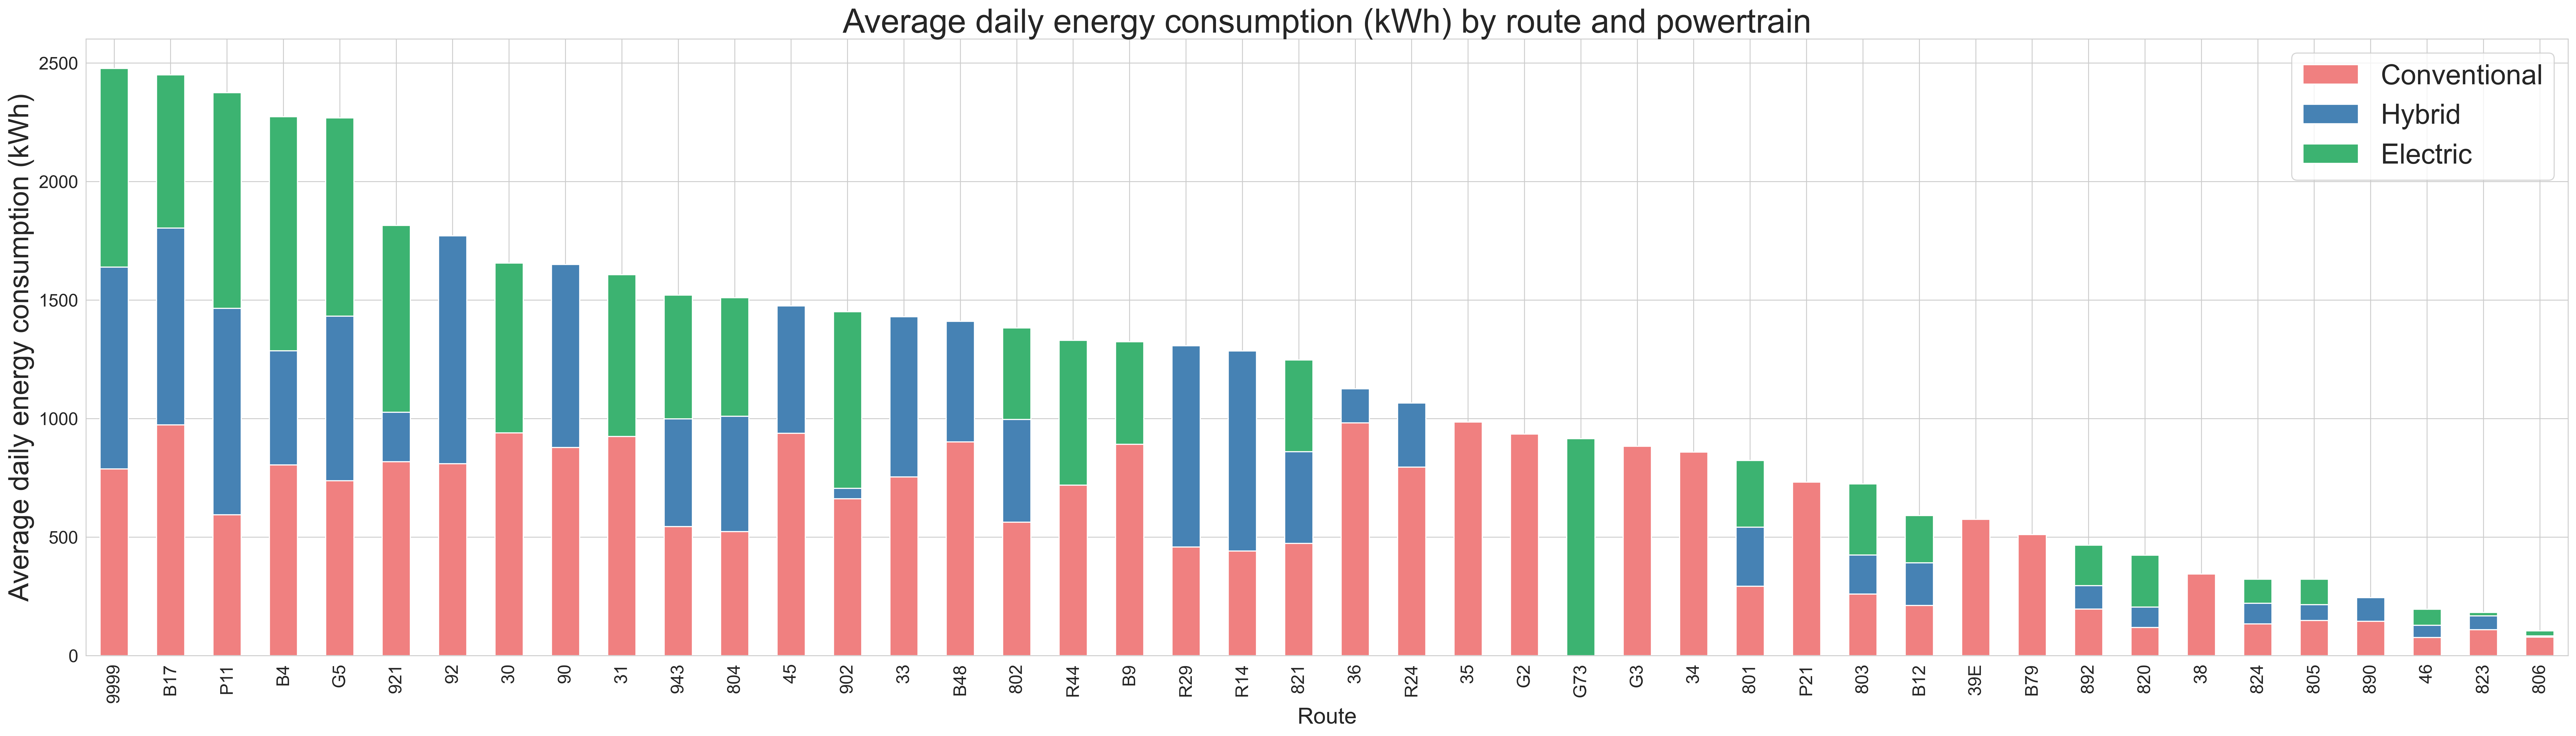

In [35]:
# Create the plot
fig, ax = plt.subplots(figsize=(40, 10), dpi=400)

pivot_df.plot(kind='bar', stacked=True, ax=ax, color=['lightcoral', 'steelblue', 'mediumseagreen'])

ax.set_xlabel('Route', fontsize=20)
ax.set_ylabel('Average daily energy consumption (kWh)', fontsize=25)
ax.set_title('Average daily energy consumption (kWh) by route and powertrain', fontsize=30)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Create the legend
ax.legend(['Conventional', 'Hybrid', 'Electric'], loc='upper right', fontsize=25)

plt.show()


In [ ]:
# Create a pivot table
pivot_df = df_model_aggregated_routes_daily.pivot_table(values='Energy', index='Route', columns='Powertrain', aggfunc='mean')

# Fill NaN values with 0
pivot_df = pivot_df.fillna(0)

# Sort the DataFrame by the sum of energies
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

In [36]:
df_model_aggregated_routes_daily.columns

Index(['Route', 'Date', 'Energy', 'dist', 'Onboard', 'Powertrain',
       'VehicleModel', 'fuel_economy', 'energy_intensity'],
      dtype='object')

In [ ]:
import folium


# Prepare an empty map centered around Pioneer Valley Transit Authority
m = folium.Map(location=[42.373611, -72.109733], zoom_start=10)

# Create a feature group for each powertrain type (to handle layer control)
powertrain_feature_groups = {
    'conventional': folium.FeatureGroup(name="Conventional", show=False),
    'hybrid': folium.FeatureGroup(name="Hybrid", show=False),
    'electric': folium.FeatureGroup(name="Electric", show=False)
}

# Add each feature group to the map
for feature_group in powertrain_feature_groups.values():
    m.add_child(feature_group)

for route in df['Route'].unique():
    df_route = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['Route'] == route]
    
    if not df_route.empty:
        # Find the most repeated VehicleModel for the current route
        most_repeated_vehicle_model = df_route['VehicleModel'].value_counts().idxmax()
        
        # Get the powertrain for the most repeated VehicleModel
        powertrain = df_model_aggregated_routes_daily[df_model_aggregated_routes_daily['VehicleModel'] == most_repeated_vehicle_model]['Powertrain'].iloc[0]
        
        color, label = color_label_map[powertrain]
        
        # Get the data for the current route
        df_route = df[df['Route'] == route]
        
        for idx, row in df_route.iterrows():
            # Add a marker for the bus stop
            folium.CircleMarker(
                location=[row['Lat'], row['Lon']],
                radius=5,  
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                popup=f'Route: {row["Route"]}, Stop: {row["Stop"]}, Energy consumption: {mean_energy_sorted[route]}'
            ).add_to(powertrain_feature_groups[powertrain])  # add to corresponding feature group based on powertrain

# Add layer control to the map (will allow to hide/show each powertrain type)
folium.LayerControl().add_to(m)

# Add legend manually
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 150px; height: 90px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Legend <br>
                              &nbsp; Conventional &nbsp; <i class="fa fa-circle fa-1x" style="color:lightcoral"></i><br>
                              &nbsp; Hybrid &nbsp; <i class="fa fa-circle fa-1x" style="color:steelblue"></i><br>
                              &nbsp; Electric &nbsp; <i class="fa fa-circle fa-1x" style="color:mediumseagreen"></i>
                </div>
                ''' 
m.get_root().html.add_child(folium.Element(legend_html))

# Show the map
#m.save('routes_map.html')
m.save(r'../../figures/routes_map.html')

#fig.savefig(r'../../figures/pv-bus-streets.png', dpi=400, bbox_inches='tight')

In [ ]:
# Group by 'Route' and 'Powertrain' and calculate count or mean energy consumption
grouped_df = df_model_aggregated_routes_daily.groupby(['Route', 'Powertrain'])['Energy'].mean()

# Reset index
grouped_df = grouped_df.reset_index()

# Create a map centered around Pioneer Valley
m = folium.Map(location=[42.3756, -72.5198], zoom_start=11)

# Add a marker for each powertrain type for each bus stop in each route
for route in df['Route'].unique():
    df_route = df[df['Route'] == route]
    grouped_route = grouped_df[grouped_df['Route'] == route]
    
    for idx, row in df_route.iterrows():
        for _, powertrain_row in grouped_route.iterrows():
            powertrain = powertrain_row['Powertrain']
            energy = powertrain_row['Energy']
            
            # Define color based on powertrain
            color, _ = color_label_map[powertrain]
            
            # Add a circle for this powertrain type
            folium.Circle(
                location=[row['Lat'], row['Lon']],
                radius=energy * 1000,  # adjust this multiplier as necessary to get a suitable circle size
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                popup=f'Route: {row["Route"]}, Stop: {row["Stop"]}, Powertrain: {powertrain}, Energy: {energy}'
            ).add_to(m)
            
# Show the map
m.save(r'../../figures/routes_map.html')


In [ ]:
import matplotlib.pyplot as plt

# Ensure that 'Transaction Date' is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'])

# Group data by Transaction Date and take the mean of the Quantity
df_grouped = df.groupby('Transaction Date')['Qty'].mean().reset_index()
df_clean_grouped = df_clean.groupby('Transaction Date')['Qty'].mean().reset_index()

# Calculate mean of Qty in both dataframes
mean_df = df['Qty'].mean()
mean_df_clean = df_clean['Qty'].mean()

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Transaction Date'], df_grouped['Qty'], label='Original', alpha=0.5)
plt.plot(df_clean_grouped['Transaction Date'], df_clean_grouped['Qty'], label='Cleaned', linestyle='--', alpha=0.5)

# Add mean lines
plt.axhline(mean_df, color='blue', linestyle='-.', label='Mean Original', alpha=0.5)
plt.axhline(mean_df_clean, color='orange', linestyle='-.', label='Mean Cleaned', alpha=0.5)

plt.title('Mean Quantity of fuel over time')
plt.xlabel('Transaction Date')
plt.ylabel('Qty')
plt.legend()
plt.show()
